In [1]:
import numpy as np

In [2]:
def binomial(C, A, S0, K, T, r, vol, n ): # if C = 1 means call, C = 0 means put
                                          # if A = 1 means American, A = 0 means European
    dt = T/n
    u = np.exp(vol * np.sqrt(dt))
    d = 1/u
    p = (np.exp(r * dt) - d)/(u-d)
    
    
    S = np.zeros((n+1, n+1), dtype = np.float64) # construct (n+1, n+1)matrix with all zero
    S[0, 0] = S0 
    
    for j in range(1, n+1):  # (i, j)
        for i in range(j+1):
            S[i, j] = S[0, 0] * (u**j) * (d**(i*2)) # S0*(d^2) = S0*(u^2 * d^4)
            
    
    iv = np.zeros((n+1, n+1), dtype=np.float64)
    for j in range(0, n+1):
        for i in range(j+1):
            iv[i, j] = max(C * (S[i, j]-K), 0)
            
            
    pv = np.zeros((n+1, n+1), dtype=np.float64)
    pv[:, n] = iv[:, n] # 最終期的選擇權價值 = 內涵價值
    
    for j in range(n-1, -1, -1):
        for i in range(j+1):
            pv[i, j] = max((p * pv[i, j+1] + (1-p)*pv[i+1, j+1]) * np.exp(-r * dt), A*iv[i, j]) # 期望值折現
    print(S[:, :])
    print("-"*80)
    print(pv[:, :])
    print("-"*80)
    print("option price is: ", pv[0, 0])

In [3]:
binomial(C = 1, # if C = 1 means call, C = 0 means put
         A = 1, # if A = 1 means American, A = 0 means European
         S0 = 40,
         K = 40, # strike price
         r = 0.04, #risk-free rate
         vol = 0.3,
         T = 0.5, #years
         n = 5) # steps

[[40.         43.98056289 48.35724781 53.16947447 58.4605854  64.27823633]
 [ 0.         36.37970719 40.         43.98056289 48.35724781 53.16947447]
 [ 0.          0.         33.08707737 36.37970719 40.         43.98056289]
 [ 0.          0.          0.         30.09245466 33.08707737 36.37970719]
 [ 0.          0.          0.          0.         27.36886723 30.09245466]
 [ 0.          0.          0.          0.          0.         24.8917844 ]]
--------------------------------------------------------------------------------
[[ 3.92290399  6.13766661  9.2885483  13.48819788 18.62026583 24.27823633]
 [ 0.          1.76239916  3.06841502  5.20653472  8.51692824 13.16947447]
 [ 0.          0.          0.48398538  0.97694398  1.97200075  3.98056289]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]
-----------------

### 以下為老師VBA的結果

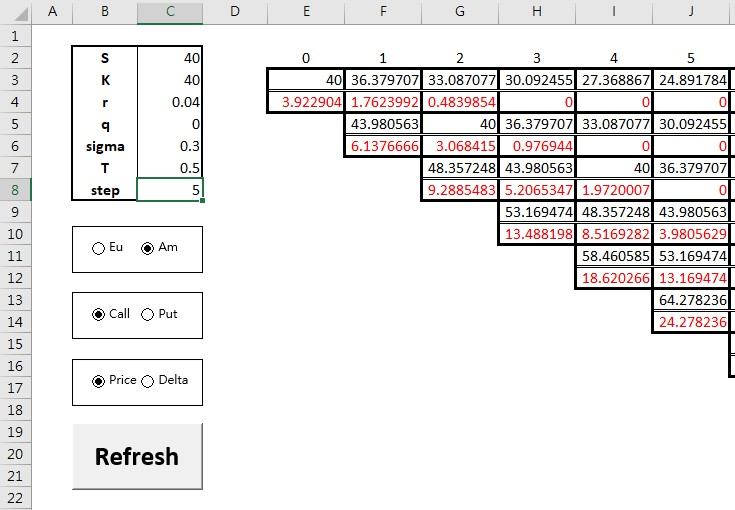